[參考](https://ithelp.ithome.com.tw/articles/10247304)

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # 印出當前tensorflow的版本，目前是2.11

2.11.0


In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()#匯入資料

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)#函數是numpy.core.fromnumeric中的函數，它的功能是查看矩陣或者數組的維數
print(
"""
----------(不要在意這個下面是重點)
\n 所以(60000, 28, 28) -> 60000張，每張像素是28x28
"""
)

(60000, 28, 28)

----------(不要在意這個下面是重點)

 所以(60000, 28, 28) -> 60000張，每張像素是28x28



In [ ]:
train_images

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
len(train_labels)#x只是28*28

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape#結構 測試集
print(
"""
--------------------(不要在意這個下面是重點)
\n 所以(10000, 28, 28) -> 10000張，每張像素是28x28
"""
)


--------------------(不要在意這個下面是重點)

 所以(10000, 28, 28) -> 10000張，每張像素是28x28



In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

* 通常我們要處理資料時，我們要將其標準化到0~1的範圍，這樣子才不會因為不同的資料的尺度(scale)不同，
影響到模型的訓練或它們對於結果影響的比例。
* 由於灰階影像的值是0~255，所以我們可以選擇全數除以255.0來等比例縮小,接著再取前25張圖來檢查處理過的資料是否正常仍可顯示：

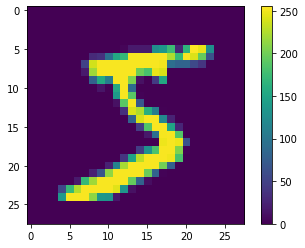

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 用來顯示灰階影像(0-255)
plt.grid(False)
plt.show()

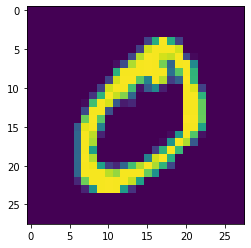

In [ ]:
plt.imshow(train_images[1])

* 要訓練模型之前，首先我們要先將模型的神經網路建構起來，通常狀態下神經網路是以層(layer)為單位，層與層彼此之間進行連接，多個層最終構成一個神經網路。

|⚡func|😕用途|
|:---:|:----:|
|Sequential|代表前面的往後面的承接|
|Flatten|代表將輸入的東西攤平成一維(28*28=784)
Dense: Dense layer又稱全連接層，也就是像握手一樣，
上一層的每個神經元和這層的神經元的每一個組合都有連接到|
|activation|激勵函式(activation function)，簡單來說，就是一個讓整個神經連接呈現不是線性的狀態。|

* 因為若是一個模型可以用很簡單的公式或者線性可表達的函數算出來，這樣子的狀態不是深度學習所要的，因為如果一般的方式可以算的話，深度學習並沒有比較具備優勢。
> (其它目的還有避免過擬合或節省部分計算的考量，我們暫且不深入探討)
> * 問題:  
> 1.[為什麼Dense要設成128 512?](https://ithelp.ithome.com.tw/articles/10234059)  
  **理論上，越多神經元表示迴歸線的特徵數越多，預測應該越準確。分別將神經元個數設為 32/128/512 ：有趣的事發生了，神經元個數越多，準確率並沒有越高**  
> 2.[activation](https://keras.io/api/layers/activations/)


In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
print(
    """
    -----------------(下面才是重點)
    \t
    relu 執行第一次類神經
    """
)
network.add(layers.Dense(10, activation='softmax'))
print(
    """
    ------------------(下面才是重點)
    \t
    softmax 執行最後類神經 10是0-9 跟機率有關
    """
)


    -----------------(下面才是重點)
    	
    relu 執行第一次類神經
    

    ------------------(下面才是重點)
    	
    softmax 執行最後類神經 10是0-9 跟機率有關
    


|⚡func|😕用途|
|:---:|:----:|
|Loss function(損失函數)|用來評估說模型現在給出的答案和正確答案的差距的函式，這個可以有很多種類，這裡用的是用來衡量分類的SparseCategoricalentropy。|
|Optimizer(優化器)|我們在修正時，不會直接將Loss給出來的差直接處理掉，而是會有一個評估要往哪個方向修正多少的方法做為基準。(因為這個點完全相等並不能代表另一個會表現好)除了adam以外，sgd, adagrad等都是常見的優化器。|
|Metrics(指標)|在訓練的過程中我們會想看的中途狀況|
|accuracy|計算每次有正確被分類的圖片的比例|

* 問題:  
[優化器選擇1](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db)  
[優化器選擇2](https://medium.com/chung-yi/ml%E5%85%A5%E9%96%80-%E5%8D%81%E4%BA%8C-sgd-adagrad-momentum-rmsprop-adam-optimizer-e331ef3cf5cf)

* 它會影響深度學習計算效率?  
float64佔用的內存是float32的兩倍，是float16的4倍；比如對於CIFAR10數據集，如果採用float64來表示，需要60000*32*32*3*8/1024**3=1.4G，光把數據集調入內存就需要1.4G；如果採用float32，只需要0.7G，如果採用float16，只需要0.35G左右；佔用內存的多少，會對系統運行效率有嚴重影響；（因此數據集文件都是採用uint8來存在數據，保持文件最小）  
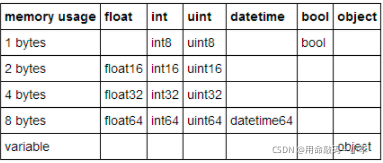


In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#complie編譯

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
print(
"""
通常我們要處理資料時，
我們要將其標準化到0~1的範圍，
這樣子才不會因為不同的資料的尺度(scale)不同，
影響到模型的訓練或它們對於結果影響的比例。
由於灰階影像的值是0~255，所以我們可以選擇全數除以255.0來等比例縮小
"""
)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255



通常我們要處理資料時，
我們要將其標準化到0~1的範圍，
這樣子才不會因為不同的資料的尺度(scale)不同，
影響到模型的訓練或它們對於結果影響的比例。
由於灰階影像的值是0~255，所以我們可以選擇全數除以255.0來等比例縮小



In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)#標籤類別化
test_labels = to_categorical(test_labels)


In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 11ms/step - loss: 0.2655 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1053 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0696 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0384 - accuracy: 0.9888




Check documentation for model.fit here.

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like this:

enter image description here

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('\n test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0637 - accuracy: 0.9808

 test_acc: 0.9807999730110168


In [ ]:
test_loss, test_acc = network.evaluate(test_images,  test_labels, verbose=2)#512
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0637 - accuracy: 0.9808 - 636ms/epoch - 2ms/step

Test accuracy: 0.9807999730110168


In [ ]:
 import numpy as np
 x = np.array(12)
 x

array(12)

In [ ]:
x.ndim

0

In [ ]:
 x = np.array([12,3,6,14,7])
 x.ndim

1

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]])
x.ndim

2

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

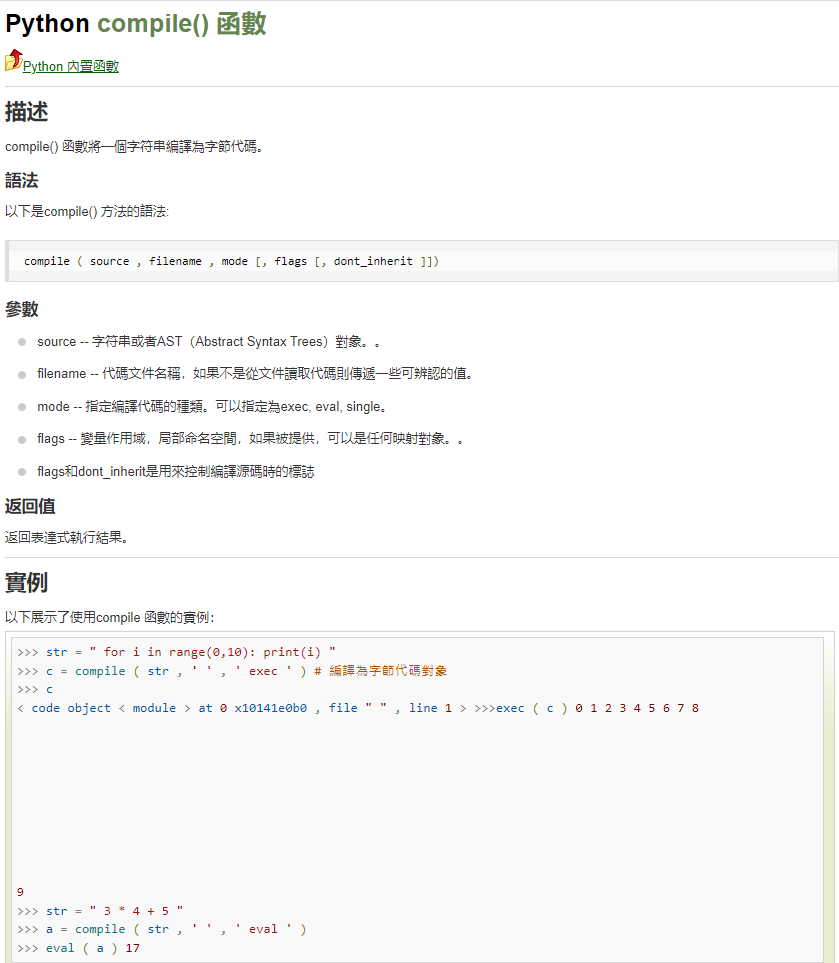